# Open Raster Data Using Rasterio In Open Source Python

Practice your skills manipulating raster data using **rioxarray**.

In [2]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr 
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [3]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

# Challenge 1: Open And Plot Hillshade
It’s time to practice your raster skills. Do the following:

Use the pre_DTM_hill.tif layer in the colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar directory.

- Open the pre_DTM_hill.tif layer using rasterio.
- Plot the data using ep.plot_bands().
- Set the colormap (cmap=) parameter value to Greys: cmap="gray"

Give you plot a title.

In [4]:
#Open the pre_DTM_hill.tif layer using rasterio.
## Define relative path to file
hillshade_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM_hill.tif")
hillshade = rxr.open_rasterio(hillshade_path, 
                                  masked=True
                                 )#masked (bool, optional) – If True, read the mask and set values to NaN. Defaults to False.

In [5]:
type(hillshade)

xarray.core.dataarray.DataArray

In [6]:
hillshade

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

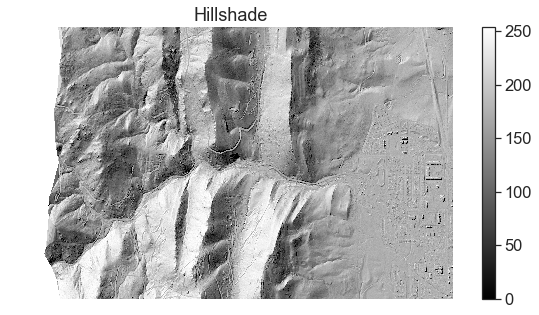

In [7]:
#Option1 without plot_bands()
# Plot the data 
# No data values are now masked
f, ax = plt.subplots(figsize=(10, 5))
hillshade.plot(cmap="gray",                   
                 ax=ax)

ax.set_title("Hillshade")
ax.set_axis_off()
plt.show()

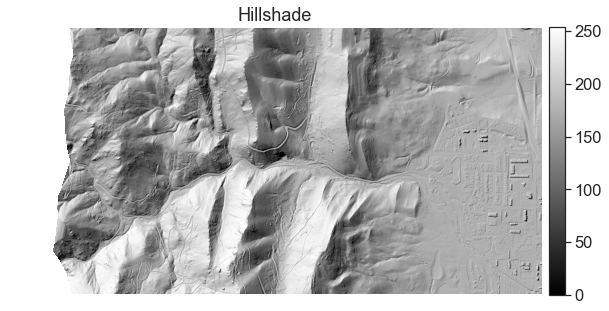

In [8]:
# Option 2 plot_bands() Much more quality
f, ax = plt.subplots(figsize=(10, 5))
ep.plot_bands(hillshade,
              cmap="gray", 
             ax=ax)

ax.set_title("Hillshade")
ax.set_axis_off()
plt.show()

# Challenge 2: Overlay DTM Over DTM Hillshade
In the challenge above, you opened and plotted a hillshade of the lidar digital terrain model create from NEON lidar data before the 2013 Colorado Flood. In this challenge, you will **use the hillshade to create a map that looks more 3-dimensional by overlaying the DTM data on top of the hillshade.**

To do this, you will need to plot each layer using ep.plot_bands()

- 1.Plot the hillshade layer pre_DTM_hill.tif that you opened in Challenge 1. Similar to Challenge one set cmap="gray"
- 2.Plot the DTM that you opened above dtm_pre_arr
    - When you plot the DTM, use the alpha= parameter to adjust the opacity of the DTM so that you can see the shading on the hillshade underneath the DTM.
    - Set the colormap to viridis (or any colormap that you prefer) cmap='viridis' for the DTM layer.

HINT: be sure to use the ax= parameter to make sure both layers are on the same figure.

In [9]:
# Define relative path to file
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

dtm_pre_arr = rxr.open_rasterio(dem_pre_path, 
                                  masked=True
                                 )#masked (bool, optional) – If True, read the mask and set values to NaN. Defaults to False.

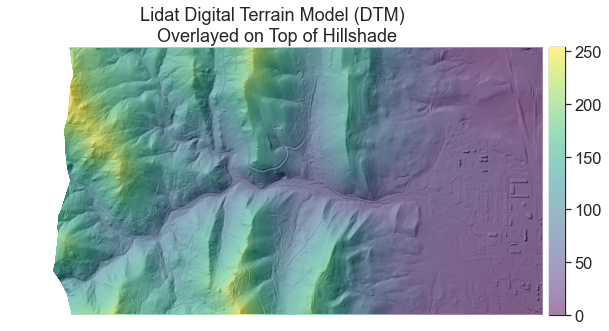

In [10]:
f, ax = plt.subplots(figsize=(10, 5))


ep.plot_bands(hillshade,
              cmap="gray", 
             ax=ax)

ep.plot_bands(dtm_pre_arr,
              cmap="viridis",
              alpha=.5,#transparencia
             ax=ax,
             )

ax.set_title("Lidat Digital Terrain Model (DTM) \n Overlayed on Top of Hillshade")
ax.set_axis_off()

plt.axis('off')
plt.show()

## Challenge 3: Add A Site Boundary to Your Raster Plot
Take all of the code that you wrote above to plot the DTM on top of your hillshade layer. Add the site boundary layer that you opened above site_bound_shp to your plot.

HINT: remember that the plotting_extent() object (lidar_dem_plot_ext) will be needed to add this final layer to your plot.

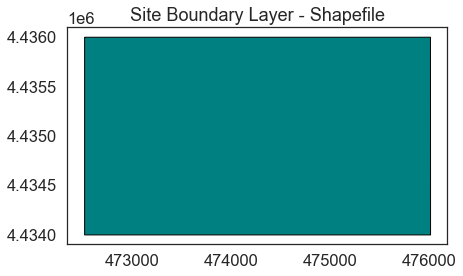

In [11]:
# Open site boundary vector layer
site_bound_path = os.path.join("colorado-flood",
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)
# Plot the vector data
f, ax = plt.subplots(figsize=(8,4))
site_bound_shp.plot(color='teal',
                    edgecolor='black',
                    ax=ax)
ax.set(title="Site Boundary Layer - Shapefile")
plt.show()

## Check crs shp crs tiff

In [12]:
site_bound_shp.crs

<Projected CRS: EPSG:32613>
Name: WGS 84 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°W and 102°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-108.0, 0.0, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
print("The CRS of this data is:", dtm_pre_arr.rio.crs)

The CRS of this data is: EPSG:32613


In [14]:
site_bound_shp.shape

(1, 2)

In [15]:
dtm_pre_arr.shape

(1, 2000, 4000)

In [16]:
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze() 

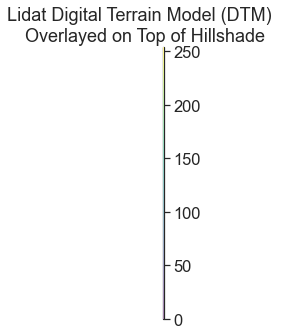

In [17]:
# Al següent tema s'explica el perquè surt a 1 dimensió
# (use the extent= parameter to specify the plotting extent within ep.plot_bands())
f, ax = plt.subplots(figsize=(10, 5))

ep.plot_bands(hillshade,
              cmap="gray", 
             ax=ax)

ep.plot_bands(dtm_pre_arr,
              cmap="viridis",
              alpha=.5,#transparencia
             ax=ax,
             )



site_bound_shp.plot(color='None',
                    edgecolor='Green',
                    linewidth=2,
                    ax=ax,
                    #zorder=4 # ordre capes
                   )

ax.set_title("Lidat Digital Terrain Model (DTM) \n Overlayed on Top of Hillshade")
ax.set_axis_off()

plt.axis('off')
plt.show()

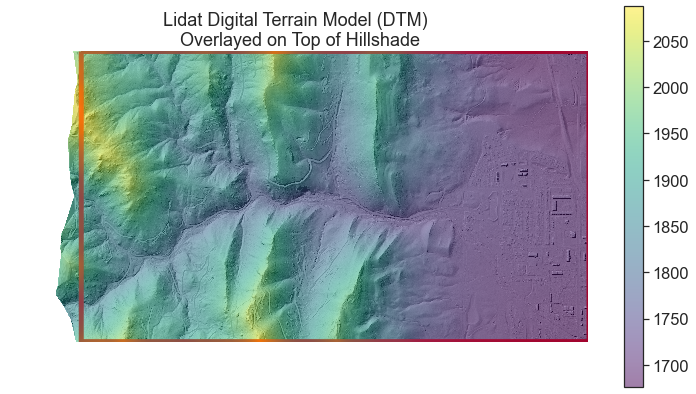

In [18]:
f, ax = plt.subplots(figsize=(13, 7))



dtm_pre_arr.plot(cmap="viridis",
                      alpha=.5,#transparencia
                        zorder=3,
                        ax=ax)
hillshade.plot(cmap="gray",
                        ax=ax,
                      zorder=2,
                      add_colorbar=False)
site_bound_shp.plot(color='None',
                    edgecolor='red',
                    linewidth=5,
                    ax=ax,
                    zorder=2)


ax.set(title="Lidat Digital Terrain Model (DTM) \n Overlayed on Top of Hillshade")
ax.axis('off')
plt.axis('off')

plt.show()

# Challenge 4 (Optional): Open Post Flood Raster
Above, you opened up a lidar derived Digital Terrain Model (DTM or DEM) that was created from data collected before the 2013 flood. In the post-flood directory, you will find a DTM containing data collected after the 2013 flood.

Create a figure with two plots.

In the first subplot, plot the pre-flood data that you opened above. In the second subplot, open and plot the post-flood DTM data. You wil find the file post_DTM.tif in the post-flood directory of your colorado-flood dataset downloaded using earthpy.

- Add a super title (a title for the entire figure) using plt.suptitle("Title Here")
- Adjust the location of your suptitle plt.tight_layout(rect=[0, 0.03, 1, 0.9])


In [19]:
# Define relative path to file
dem_post_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "post-flood",
                            "lidar",
                            "post_DTM.tif")

dtm_post_arr = rxr.open_rasterio(dem_post_path, 
                                  masked=True
                                 )#masked (bool, optional) – If True, read the mask and set values to NaN. Defaults to False.

(472000.0, 476000.0, 4434000.0, 4436000.0)

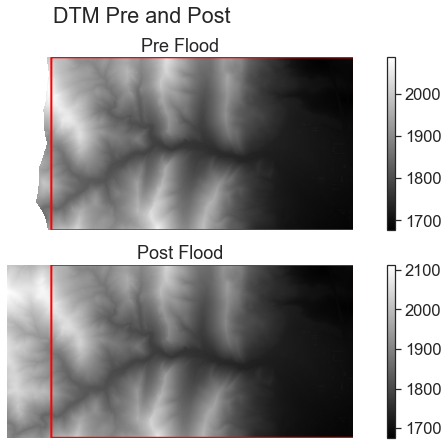

In [20]:
f, (ax1, ax2) = plt.subplots(2,figsize=(12, 7))

dtm_pre_arr.plot(
              cmap="gray",            
             ax=ax1,
             )
site_bound_shp.plot(color='None',
                    edgecolor='red',
                    linewidth=2,
                    ax=ax1,
                    zorder=2)
dtm_post_arr.plot(
              cmap="gray",            
             ax=ax2,
             )
site_bound_shp.plot(color='None',
                    edgecolor='red',
                    linewidth=2,
                    ax=ax2,
                    zorder=2)

f.suptitle('DTM Pre and Post')
ax.set(title="Lidat Digital Terrain Model (DTM) \n Overlayed on Top of Hillshade")
ax1.set(title="Pre Flood")
ax2.set(title="Post Flood")
ax1.axis('off')
plt.axis('off')